<a href="https://colab.research.google.com/github/plthiyagu/AI-Engineering/blob/master/08-NLP/How_To_Run_Sentiment_Analysis_In_Python_Using_VADER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import twitter_samples 
 
nltk.download('twitter_samples')
nltk.download('vader_lexicon')
 
# get 5000 posivie and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')
 
analyzer = SentimentIntensityAnalyzer()

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [2]:
# positive
all_positive_tweets[100]

"@metalgear_jp @Kojima_Hideo I want you're T-shirts ! They are so cool ! :D"

In [4]:
analyzer.polarity_scores(all_positive_tweets[100])

{'compound': 0.8476, 'neg': 0.0, 'neu': 0.432, 'pos': 0.568}

In [5]:
all_negative_tweets[20]

'I feel lonely someone talk to me guys and girls :(\n\n@TheOnlyRazzYT @imarieuda @EiroZPegasus @AMYSQUEE @UdotV'

In [6]:
my_labels = [1]*len(all_positive_tweets)
negative_labels = [0]*len(all_negative_tweets)
my_labels.extend(negative_labels)
 
all_positive_tweets.extend(all_negative_tweets)
 
df = pd.DataFrame({'tweets' : all_positive_tweets, 
                   'my_labels' : my_labels})
 
df 

,tweets,my_labels
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1
1,@Lamb2ja Hey James! How odd :/ Please call our...,1
2,@DespiteOfficial we had a listen last night :)...,1
3,@97sides CONGRATS :),1
4,yeaaaah yippppy!!! my accnt verified rqst has...,1
...,...,...
9995,I wanna change my avi but uSanele :(,0
9996,MY PUPPY BROKE HER FOOT :(,0
9997,where's all the jaebum baby pictures :((,0
9998,But but Mr Ahmad Maslan cooks too :( https://t...,0


In [7]:
df['neg'] = df['tweets'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
df['neu'] = df['tweets'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
df['pos'] = df['tweets'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
df['compound'] = df['tweets'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
df

,tweets,my_labels,neg,neu,pos,compound
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1,0.000,0.615,0.385,0.7579
1,@Lamb2ja Hey James! How odd :/ Please call our...,1,0.145,0.585,0.270,0.6229
2,@DespiteOfficial we had a listen last night :)...,1,0.000,0.706,0.294,0.7959
3,@97sides CONGRATS :),1,0.000,0.123,0.877,0.7983
4,yeaaaah yippppy!!! my accnt verified rqst has...,1,0.000,0.718,0.282,0.7950
...,...,...,...,...,...,...
9995,I wanna change my avi but uSanele :(,0,0.391,0.609,0.000,-0.5927
9996,MY PUPPY BROKE HER FOOT :(,0,0.617,0.383,0.000,-0.7531
9997,where's all the jaebum baby pictures :((,0,0.000,1.000,0.000,0.0000
9998,But but Mr Ahmad Maslan cooks too :( https://t...,0,0.325,0.675,0.000,-0.5927


In [8]:
df

,tweets,my_labels,neg,neu,pos,compound
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1,0.000,0.615,0.385,0.7579
1,@Lamb2ja Hey James! How odd :/ Please call our...,1,0.145,0.585,0.270,0.6229
2,@DespiteOfficial we had a listen last night :)...,1,0.000,0.706,0.294,0.7959
3,@97sides CONGRATS :),1,0.000,0.123,0.877,0.7983
4,yeaaaah yippppy!!! my accnt verified rqst has...,1,0.000,0.718,0.282,0.7950
...,...,...,...,...,...,...
9995,I wanna change my avi but uSanele :(,0,0.391,0.609,0.000,-0.5927
9996,MY PUPPY BROKE HER FOOT :(,0,0.617,0.383,0.000,-0.7531
9997,where's all the jaebum baby pictures :((,0,0.000,1.000,0.000,0.0000
9998,But but Mr Ahmad Maslan cooks too :( https://t...,0,0.325,0.675,0.000,-0.5927


In [9]:
df.groupby('my_labels')['compound'].describe()

,count,mean,std,min,25%,50%,75%,max
my_labels,,,,,,,,
0,5000.0,-0.265648,0.425077,-0.9686,-0.5719,-0.4404,0.000,0.9781
1,5000.0,0.579361,0.305145,-0.9576,0.4588,0.6597,0.802,0.9872


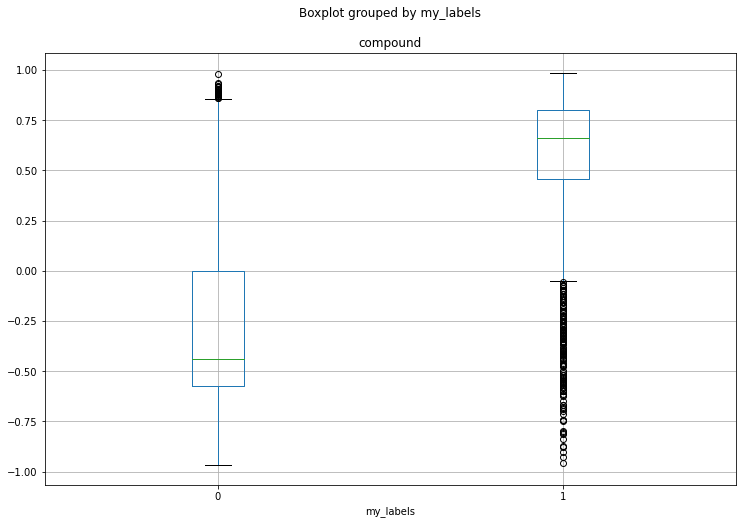

In [10]:
df.boxplot(by='my_labels', column='compound', figsize=(12,8))